In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

**LOADING THE DATASET**

In [ ]:
df = pd.read_csv('drugs_side_effects_drugs_com.csv')
print(df.head())

        drug_name medical_condition  \
0     doxycycline              Acne   
1  spironolactone              Acne   
2     minocycline              Acne   
3        Accutane              Acne   
4     clindamycin              Acne   

                                        side_effects         generic_name  \
0  (hives, difficult breathing, swelling in your ...          doxycycline   
1  hives ; difficulty breathing; swelling of your...       spironolactone   
2  skin rash, fever, swollen glands, flu-like sym...          minocycline   
3  problems with your vision or hearing; muscle o...  isotretinoin (oral)   
4  hives ; difficult breathing; swelling of your ...  clindamycin topical   

                                        drug_classes  \
0         Miscellaneous antimalarials, Tetracyclines   
1  Aldosterone receptor antagonists, Potassium-sp...   
2                                      Tetracyclines   
3  Miscellaneous antineoplastics, Miscellaneous u...   
4       Topical acne a

**DATA EXPLORATION**

In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2931 entries, 0 to 2930
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   drug_name                      2931 non-null   object
 1   medical_condition              2931 non-null   object
 2   side_effects                   2931 non-null   object
 3   generic_name                   2931 non-null   object
 4   drug_classes                   2931 non-null   object
 5   brand_names                    2931 non-null   object
 6   activity                       2931 non-null   object
 7   rx_otc                         2931 non-null   object
 8   pregnancy_category             2931 non-null   object
 9   csa                            2931 non-null   object
 10  alcohol                        2931 non-null   object
 11  related_drugs                  2931 non-null   object
 12  medical_condition_description  2931 non-null   object
 13  rat

,drug_name,medical_condition,side_effects,generic_name,drug_classes,brand_names,activity,rx_otc,pregnancy_category,csa,alcohol,related_drugs,medical_condition_description,rating,no_of_reviews,drug_link,medical_condition_url
count,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931,2931
unique,2912,47,2760,1393,275,1553,93,4,7,7,2,536,47,87,302,2931,47
top,triamcinolone,Pain,Unknown,Unknown,Upper respiratory combinations,Unknown,0%,Rx,C,N,Unknown,Unknown,Pain An unpleasant sensory and emotional exper...,Unknown,Unknown,https://www.drugs.com/mtm/setmelanotide.html,https://www.drugs.com/condition/pain.html
freq,3,264,124,43,245,1213,895,1998,1382,2688,1554,1469,264,1345,1345,1,264


**DATA CLEANING**

In [ ]:
print(df.isnull().sum())
df.drop_duplicates(inplace=True)
df.fillna('Unknown', inplace=True)

drug_name                           0
medical_condition                   0
side_effects                      124
generic_name                       43
drug_classes                       82
brand_names                      1213
activity                            0
rx_otc                              1
pregnancy_category                229
csa                                 0
alcohol                          1554
related_drugs                    1469
medical_condition_description       0
rating                           1345
no_of_reviews                    1345
drug_link                           0
medical_condition_url               0
dtype: int64


/tmp/ipython-input-6-1046336847.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna('Unknown', inplace=True)


**EDA (Exploratory Data Analysis)**

1. Top 10 Most Effective Drugs (Average Rating)

/tmp/ipython-input-10-2726255106.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated.values, y=top_rated.index, palette='viridis')


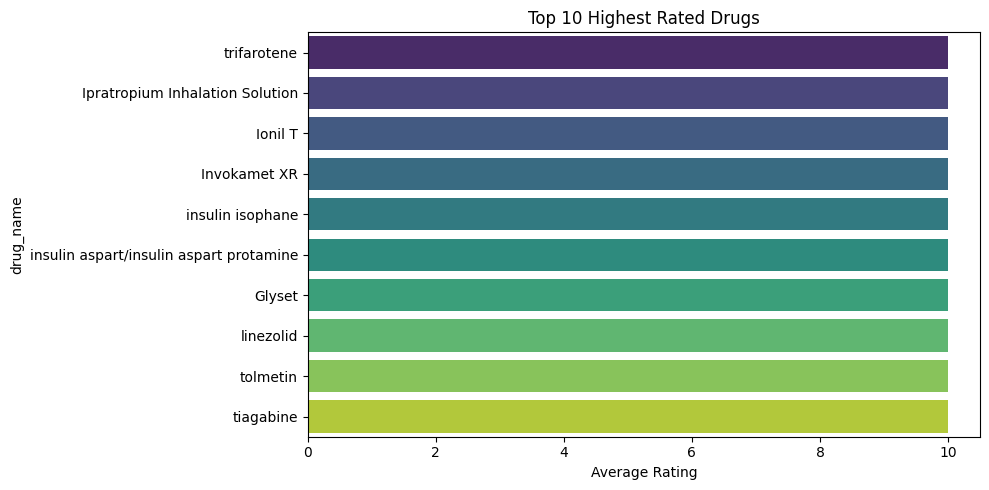

In [ ]:
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])
top_rated = df.groupby('drug_name')['rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_rated.values, y=top_rated.index, palette='viridis')
plt.title("Top 10 Highest Rated Drugs")
plt.xlabel("Average Rating")
plt.tight_layout()
plt.show()


2. Drug Count by Drug Class

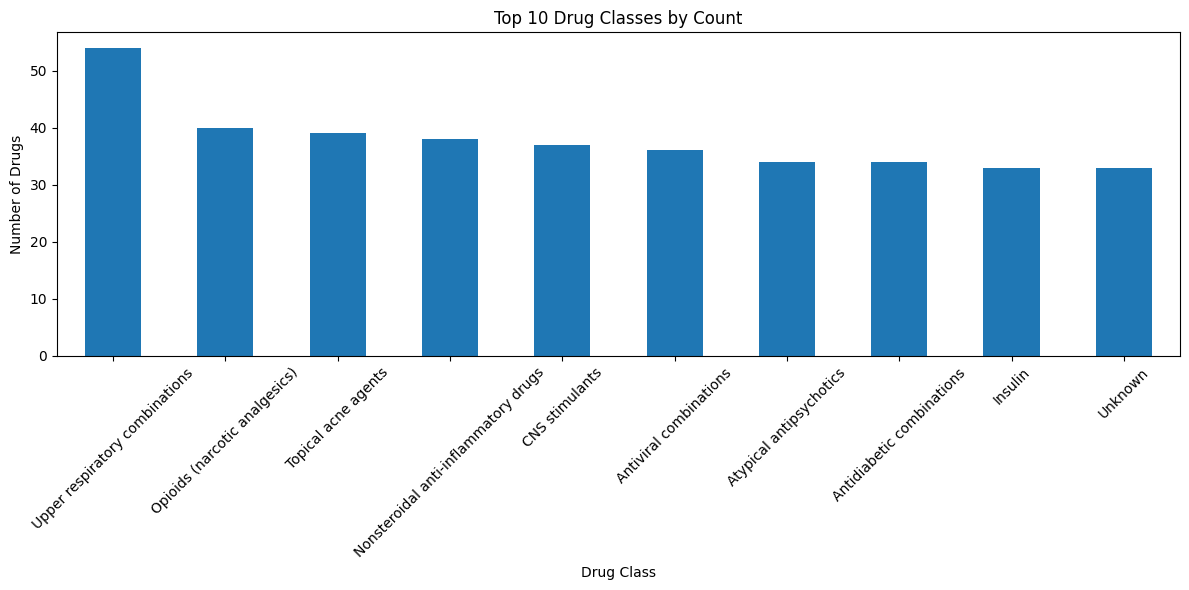

In [ ]:
plt.figure(figsize=(12,6))
df['drug_classes'].value_counts().head(10).plot(kind='bar')
plt.title("Top 10 Drug Classes by Count")
plt.xlabel("Drug Class")
plt.ylabel("Number of Drugs")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

3. Distribution of Ratings

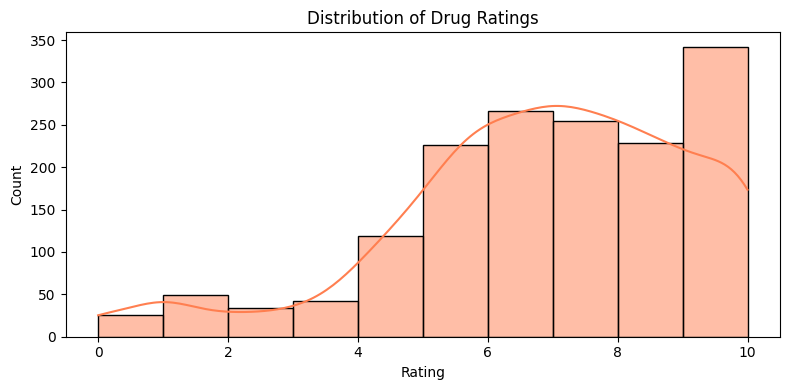

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['rating'], bins=10, kde=True, color='coral')
plt.title("Distribution of Drug Ratings")
plt.xlabel("Rating")
plt.tight_layout()
plt.show()

4. Alcohol Interaction Count

/tmp/ipython-input-13-3445711857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='alcohol', palette='Set2')


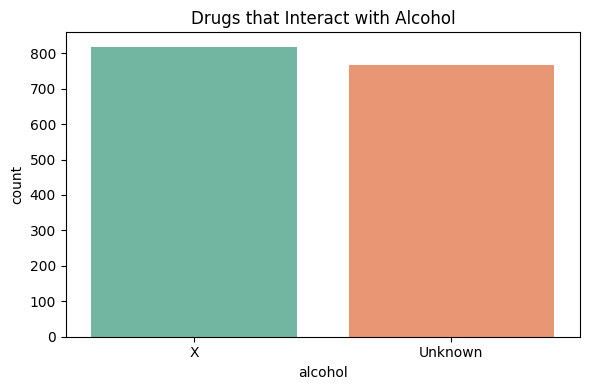

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='alcohol', palette='Set2')
plt.title("Drugs that Interact with Alcohol")
plt.tight_layout()
plt.show()

5. Drugs by Pregnancy Category

/tmp/ipython-input-14-1706866857.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='pregnancy_category', order=['A','B','C','D','X','N'], palette='coolwarm')


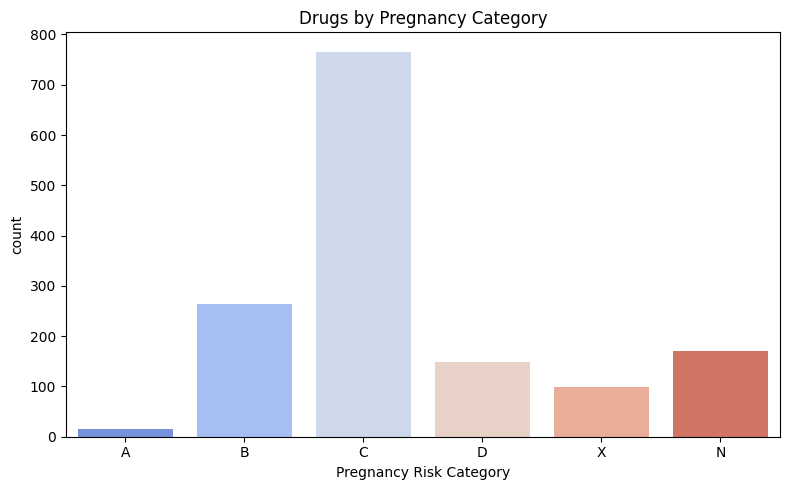

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='pregnancy_category', order=['A','B','C','D','X','N'], palette='coolwarm')
plt.title("Drugs by Pregnancy Category")
plt.xlabel("Pregnancy Risk Category")
plt.tight_layout()
plt.show()

6. Controlled Substance (CSA) Schedule Distribution

/tmp/ipython-input-15-308325696.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='csa', order=['1','2','3','4','5','M','N','U'], palette='Set3')


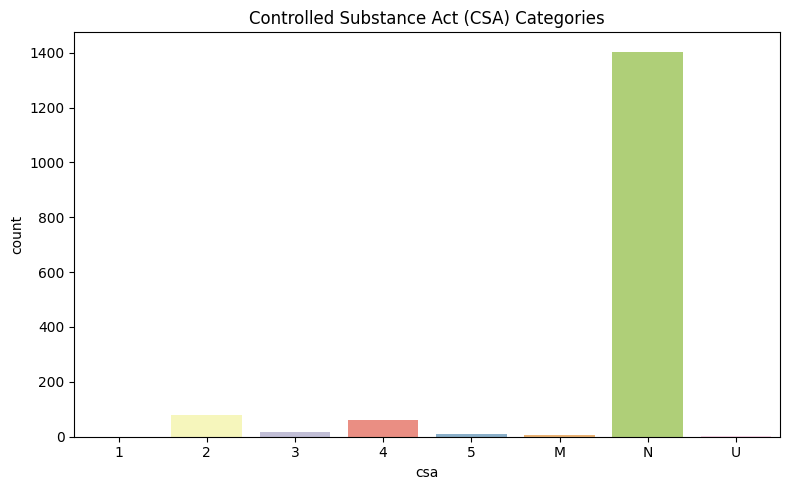

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='csa', order=['1','2','3','4','5','M','N','U'], palette='Set3')
plt.title("Controlled Substance Act (CSA) Categories")
plt.tight_layout()
plt.show()

7. Rx vs OTC Availability

/tmp/ipython-input-16-3130328784.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rx_otc', palette='Set1')


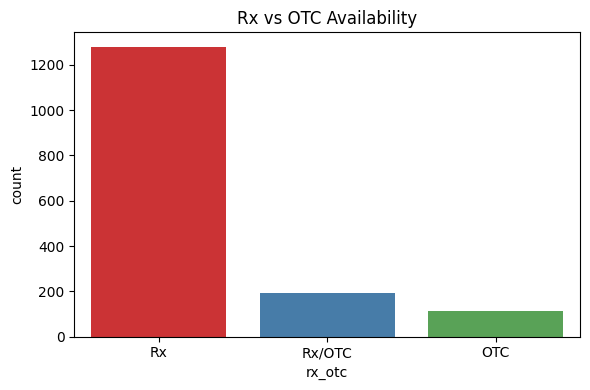

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='rx_otc', palette='Set1')
plt.title("Rx vs OTC Availability")
plt.tight_layout()
plt.show()

**ADVANCED MACHINE LEARNING MODEL**

a) Distribution of Drug Ratings

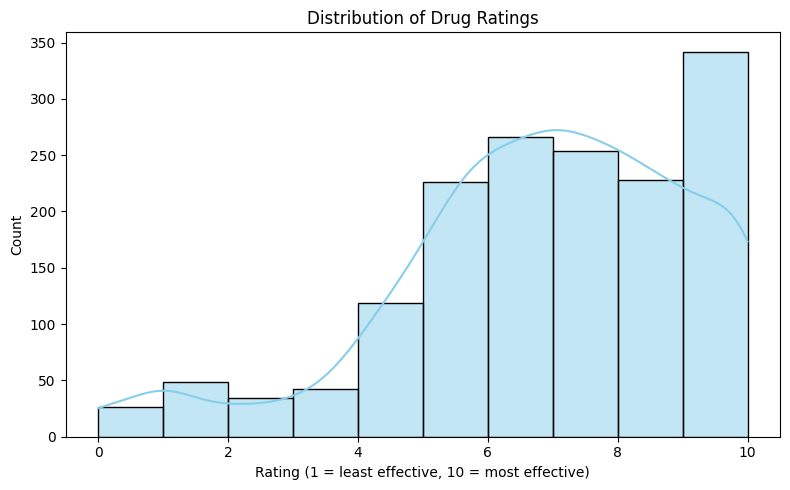

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(df['rating'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Drug Ratings")
plt.xlabel("Rating (1 = least effective, 10 = most effective)")
plt.tight_layout()
plt.show()

b) Top Drugs for a Condition (e.g., Acne)

/tmp/ipython-input-18-3727935847.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='Set2')


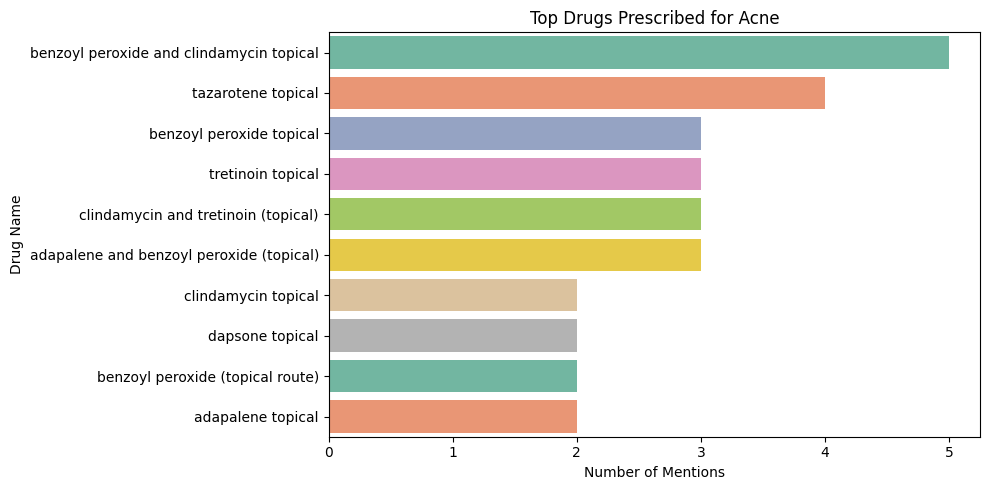

In [ ]:
condition = "Acne"
top_drugs = df[df['drug_classes'].str.contains(condition, case=False, na=False)]
top_drugs = top_drugs['generic_name'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_drugs.values, y=top_drugs.index, palette='Set2')
plt.title(f"Top Drugs Prescribed for {condition}")
plt.xlabel("Number of Mentions")
plt.ylabel("Drug Name")
plt.tight_layout()
plt.show()

 c) Side Effects Analysis

/tmp/ipython-input-19-3792584258.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(effects), palette='flare')


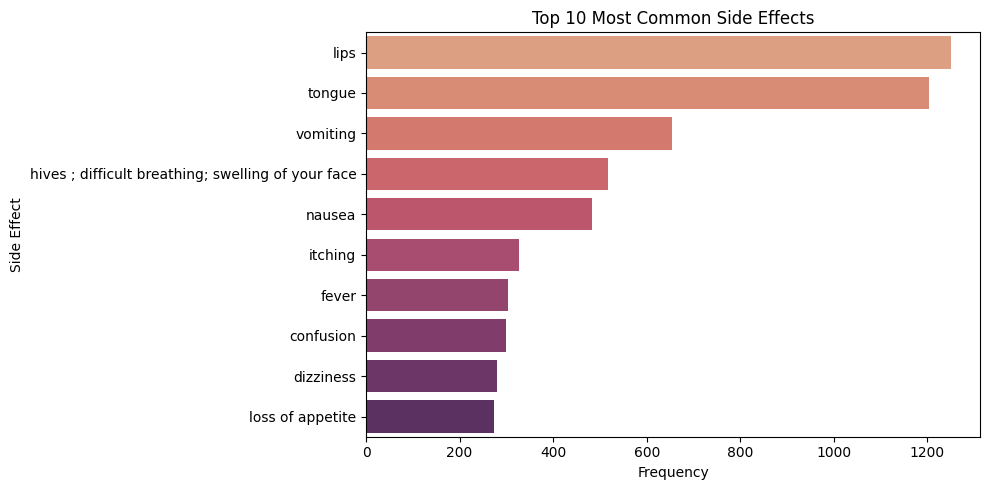

In [ ]:
from collections import Counter

side_effects_list = df['side_effects'].dropna().str.split(',').sum()
common_effects = Counter([s.strip().lower() for s in side_effects_list]).most_common(10)

effects, counts = zip(*common_effects)
plt.figure(figsize=(10,5))
sns.barplot(x=list(counts), y=list(effects), palette='flare')
plt.title("Top 10 Most Common Side Effects")
plt.xlabel("Frequency")
plt.ylabel("Side Effect")
plt.tight_layout()
plt.show()